In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data = data.where(pd.notna(data), '')

In [4]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)

In [5]:
data.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='Category', ylabel='count'>

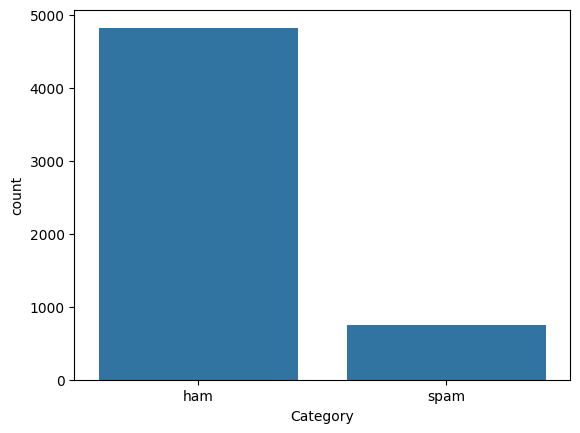

In [6]:
import seaborn as sns
sns.countplot(x = 'Category',data=data)

In [7]:
x_train , x_test, y_train, y_test = train_test_split(data['Message'],data['Category'],train_size=0.9,random_state=42)

In [8]:
print("x train shape and  and test")
print(x_train.shape)
print(x_test.shape)
print("y train shape and and test")
print(y_train.shape)
print(y_test.shape)

x train shape and  and test
(5014,)
(558,)
y train shape and and test
(5014,)
(558,)


In [9]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [10]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [16]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(f'accuracy of model {round(accuracy*100)}%')

accuracy of model 99%


In [20]:
email = ["click on this link"]
pred = clf.predict(email)
print(pred[0])

spam
